In [5]:
import random

def Graph(n):
    matrix = [([0] * n) for i in range(n)] 
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix[i][j] = 0
            else:
                matrix[i][j] = random.randrange(1, 30)
    return matrix

#dynamic programming
import copy
def TSP_DP(matrix, n):
    g = {}
    p = []

    for x in range(1, n):
        g[x + 1, ()] = matrix[x][0]

    weight = get_minimum(1, (range(2, n + 1)), g, p)

    return weight


def get_minimum(k, a, g, p):
    if (k, a) in g:
        # Already calculated Set g[%d, (%s)]=%d' % (k, str(a), g[k, a]))
        return g[k, a]

    values = []
    all_min = []
    for j in a:
        set_a = copy.deepcopy(list(a))
        set_a.remove(j)
        all_min.append([j, tuple(set_a)])
        result = get_minimum(j, tuple(set_a), g, p)
        values.append(matrix[k - 1][j - 1] + result)

    # get minimun value from set as optimal solution for
    g[k, a] = min(values)
    p.append(((k, a), all_min[values.index(g[k, a])]))

    return g[k, a]

#Backtracking
#https://www.geeksforgeeks.org/travelling-salesman-problem-implementation-using-backtracking/
answer = []

def TSP_BT(graph, v, currPos, n, count, cost):
	if (count == n and graph[currPos][0]):
		answer.append(cost + graph[currPos][0])
		return

	# BACKTRACKING STEP
	for i in range(n):
		if (v[i] == False and graph[currPos][i]):
			
			# Mark as visited
			v[i] = True
			TSP_BT(graph, v, i, n, count + 1, cost + graph[currPos][i])
			
			# Mark ith node as unvisited
			v[i] = False

In [9]:
#main function
import time
import csv

g = {}
p = []
l = []
a = ()
DP_time = []
BT_time = []
error_weight = []
for V in range(4, 13): 
    print("vertex number: ", V)
    matrix = Graph(V)
                     
    #run TSP_DP
    start = time.time()
    r1 = TSP_DP(matrix, V)
    end = time.time()
    time1 = end-start
    DP_time.append(time1)
    print("DP_weight:", r1, "; DP_time:", time1)
            
    #run TSP_BT
    start = time.time()
    v = [False for i in range(V)]
    v[0] = True # Mark 0th node as visited
    TSP_BT(matrix, v, 0, V, 1, 0) # Find the minimum weight Hamiltonian Cycle
    r2 = min(answer) # ans is the minimum weight Hamiltonian Cycle
    end = time.time()
    time2 = end-start
    BT_time.append(time2)
    print("BT_weight:", r2, "; BT_time:", time2)
                    
                    
    #calculate error
    error = (r2 - r1)/r1
    error_weight .append(error)
    print("error:", error)
    
    print("-------------------------------------------------")

    with open('TSP_data(DP, BT).csv', 'a+', newline='')as csvFile:        
        csvWriter = csv.writer(csvFile)
        #csvWriter.writerow(['vertex number', 'dp weight','na weight','dp time', 'na time', 'error'])
        csvWriter.writerow([str(V), str(r1), str(r2), str(time1), str(time2), str(error)])    
    csvFile.close()
    

vertex number:  4
DP_weight: 38 ; DP_time: 0.0001227855682373047
BT_weight: 30 ; BT_time: 0.7714641094207764
error: -0.21052631578947367
-------------------------------------------------
vertex number:  5
DP_weight: 34 ; DP_time: 0.00095367431640625
BT_weight: 30 ; BT_time: 0.7339744567871094
error: -0.11764705882352941
-------------------------------------------------
vertex number:  6
DP_weight: 46 ; DP_time: 0.0009951591491699219
BT_weight: 30 ; BT_time: 0.7232925891876221
error: -0.34782608695652173
-------------------------------------------------
vertex number:  7
DP_weight: 48 ; DP_time: 0.005316734313964844
BT_weight: 30 ; BT_time: 0.7294094562530518
error: -0.375
-------------------------------------------------
vertex number:  8
DP_weight: 41 ; DP_time: 0.009012937545776367
BT_weight: 30 ; BT_time: 0.7557284832000732
error: -0.2682926829268293
-------------------------------------------------
vertex number:  9
DP_weight: 54 ; DP_time: 0.025101423263549805
BT_weight: 30 ; BT_t

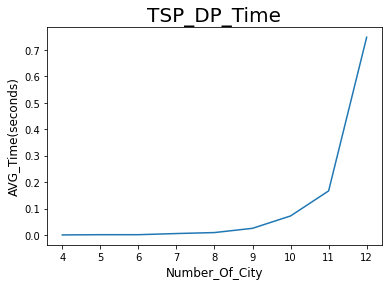

In [11]:
import random,time
import matplotlib.pyplot as plt
import numpy as np
#DP圖
xpt = [i for i in range(4,13)]
ypt = DP_time
plt.plot(xpt,ypt) #畫線
plt.title("TSP_DP_Time", fontsize=20) #圖表標題
plt.xlabel("Number_Of_City", fontsize=12) #x軸標題
plt.ylabel("AVG_Time(seconds)", fontsize=12) #y軸標題
plt.show() #顯示繪製的圖形

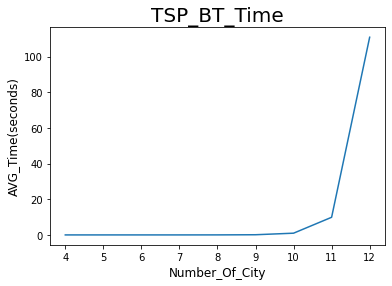

In [8]:
#BT圖
xpt = [i for i in range(4,13)]
ypt = BT_time
plt.plot(xpt,ypt) #畫線
plt.title("TSP_BT_Time", fontsize=20) #圖表標題
plt.xlabel("Number_Of_City", fontsize=12) #x軸標題
plt.ylabel("AVG_Time(seconds)", fontsize=12) #y軸標題
plt.show() #顯示繪製的圖形

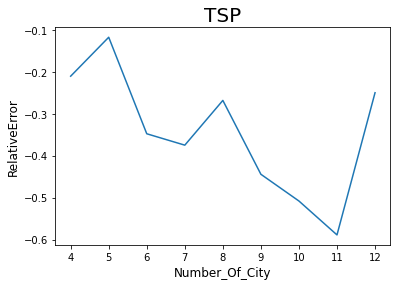

In [10]:
#comparison
xpt = [i for i in range(4,13)]
ypt = error_weight #( |(GY值-DP值)| )/ (DP值)
plt.plot(xpt,ypt) #畫線
plt.title("TSP", fontsize=20) #圖表標題
plt.xlabel("Number_Of_City", fontsize=12) #x軸標題
plt.ylabel("RelativeError", fontsize=12) #y軸標題
plt.show() #顯示繪製的圖形